From <a href="www.interviewqs.com">Data Interview Qs</a> - sign up to receive a few DS questions/week via email.



---



<h4>Value at risk (VaR)</h4>
<p>Estimating the risk of a portfolio is very important to long-term capital growth. There are a lot of techniques to help manage risk, but here we'll be covering 'value at risk' (VaR).</p>
<p>There are two main ways to calculate VaR:</p>
<ol>
<li>Using Monte Carlo simulation</li>
<li>Using the <a href="https://www.investopedia.com/ask/answers/041715/what-variancecovariance-matrix-or-parametric-method-value-risk-var.asp" target="_blank">variance-covariance method</a></li>
</ol>
<p>In this post, we'll focus on using method 2 (variance-covariance).</p>
<p>VaR provides an estimate of the maximum loss from a given portfolio over a period of time. You can calculate VaR at various confidence levels.</p>
<p>For example, given a VaR of 250,000 at 95% confidence, there is a 95% chance that your portfolio will lose no more than 250,000 the following day.</p>
<p>Note that the standard VaR calculation assumes the following:</p>
<ul>
<li><b>Normal distribution of returns</b> - VaR assumes the returns of the  portfolio are normally distributed. This is of course not realistic for most assets, but allows us to develop a baseline using a much more simplistic calculation. <i>(Modifications can be made to VaR to account for different distributions, but here we'll focus on the standard VaR calculation)</i></p>
<li><b>Standard market conditions</b> - Like many financial instruments, VaR is best used for considering loss in standard markets, and is not well-suited for extreme/outlier events.</li>
</ul>
</p>

<h4>Steps to calculate the VaR of a portfolio</h4>
<p>In order to calculate the VaR of your portfolio, you can follow the steps below:</p>
<ol>
  <li>Calculate periodic returns of the stocks in your portfolio</li>
  <li>Create a covariance matrix based on the returns</li>
  <li>Calculate the portfolio mean and standard deviation
  <br><i>(weighted based on investment levels of each stock in portolio)</i></li>
  <li>Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean</li>
   <li>Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4</li>
  </ol>
  

<h4>1) Calculate periodic returns of the stocks in your portfolio </h4>

In [1]:
import pandas as pd
from datetime import datetime, date, timedelta
from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf
import yfinance as yfin
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Override reader
yfin.pdr_override()

In [3]:
folio_df = pd.read_csv('https://raw.githubusercontent.com/dsimband/DATA618/main/w5/data/DATA618_Portfolio.csv', 
                 dtype={
                    'ID': 'int',
                    'Price': 'float',
                    'Shares': 'float',
                    'Value': 'float', 
                 })


folio_df = folio_df[folio_df['Shares'] > 0]
folio_df = folio_df.groupby(['Ticker','BondName','Class'])[['Shares','Value']].sum()
folio_df.reset_index(inplace=True)
#folio_df['Morningstar_Category'].fillna('Other', inplace=True)

folio_df = folio_df[4:]

portfolio_total = folio_df['Value'].sum()
folio_df['port_percent'] = folio_df['Value'] / portfolio_total

folio_df

,Ticker,BondName,Class,Shares,Value,port_percent
4,DFAR,Dimensional US Real Estate ETF,Economically Sensitive,108467.0,2250.0,0.029221
5,FREL,Fidelity MSCI Real Estate ETF,Economically Sensitive,115479.0,2800.0,0.036364
6,FSMD,Fidelity Small-Mid Multifactor ETF,Economically Sensitive,120705.0,4000.0,0.051948
7,GARIX,Gotham Absolute Return Institutional,Economically Sensitive,25278.0,500.0,0.006494
8,GCHDX,Gotham Hedged Core Institutional,Economically Sensitive,46211.0,500.0,0.006494
9,ICBFX,Invesco Corporate Bond R6,Interest Rate Sensitive,166389.0,1000.0,0.012987
10,IGMWX,Voya GNMA Income W,Interest Rate Sensitive,763889.0,5500.0,0.071429
11,IGRO,iShares International Dividend Gr ETF,Economically Sensitive,32610.0,2000.0,0.025974
12,IMCB,iShares Morningstar Mid-Cap ETF,Economically Sensitive,64494.0,4000.0,0.051948
13,ISCF,iShares MSCI Intl Small-Cap Mltfct ETF,Economically Sensitive,98007.0,3000.0,0.038961


In [4]:
#Create our portfolio of equities
#tickers = ['AAPL','META', 'C', 'DIS']
tickers = list(folio_df['Ticker'])

# Dates
start_date = datetime(2022, 1, 1)
end_date = datetime.now()

#Set the investment weights (I arbitrarily picked for example)
#weights = np.array([.25, .3, .15, .3])
weights = (folio_df['port_percent'].values)

#Set an initial investment level
initial_investment = 1000000

#Download closing prices
data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date)['Close']
#data = pdr.get_data_yahoo(ticker_lst, start=start_date, end=end_date)

#From the closing prices, calculate periodic returns
returns = data.pct_change()

[*********************100%%**********************]  31 of 31 completed


In [5]:
returns.tail()

,DFAR,FREL,FSMD,GARIX,GCHDX,ICBFX,IGMWX,IGRO,IMCB,ISCF,...,SWRSX,VBR,VFIUX,VGCAX,VICSX,VIGI,VNQ,VO,VONG,VTEB
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-09,0.013570,0.012097,0.006895,0.005641,0.007612,0.006908,0.011494,0.004076,0.007598,-0.003024,...,0.006154,0.008201,0.009464,0.007312,0.009921,0.002519,0.010899,0.007945,0.005010,0.006103
2023-10-10,0.002060,0.004869,0.007658,0.003570,0.000944,0.003431,-0.004261,0.011671,0.008881,0.013511,...,0.004077,0.008262,-0.002083,0.001117,0.000982,0.010328,0.004792,0.007882,0.004273,0.001046
2023-10-11,0.019527,0.017181,0.000340,0.002541,-0.002830,0.005128,0.007133,0.006186,0.004650,-0.001564,...,0.005076,0.004664,0.002088,0.003904,0.003925,0.008703,0.017353,0.002766,0.008226,0.007313
2023-10-12,-0.013609,-0.015375,-0.016429,-0.003548,-0.003784,-0.008503,-0.009915,-0.013460,-0.014713,-0.009537,...,-0.007071,-0.018132,-0.006250,-0.006667,-0.007331,-0.010134,-0.014583,-0.012983,-0.004642,-0.002282
2023-10-13,-0.001022,-0.001539,-0.007221,-0.006612,0.000000,0.005146,0.004292,-0.002863,-0.005705,-0.013755,...,0.006104,-0.007220,0.003145,0.004474,0.004431,-0.004981,-0.002511,-0.004481,-0.009893,0.001247


<h4>2) Create a covariance matrix based on the returns </h4>


In [6]:
#Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix


,DFAR,FREL,FSMD,GARIX,GCHDX,ICBFX,IGMWX,IGRO,IMCB,ISCF,...,SWRSX,VBR,VFIUX,VGCAX,VICSX,VIGI,VNQ,VO,VONG,VTEB
DFAR,0.000203,0.000203,1.395367e-04,7.451648e-05,9.994142e-05,2.861624e-05,2.434300e-05,0.000100,0.000155,0.000113,...,2.194446e-05,0.000156,1.571637e-05,2.228322e-05,2.722465e-05,0.000105,0.000200,0.000158,0.000153,1.336359e-05
FREL,0.000203,0.000203,1.445383e-04,7.721708e-05,1.012580e-04,2.804265e-05,2.311468e-05,0.000100,0.000159,0.000116,...,2.233279e-05,0.000160,1.552627e-05,2.169455e-05,2.655534e-05,0.000108,0.000199,0.000162,0.000161,1.261856e-05
FSMD,0.000140,0.000145,1.628944e-04,8.476429e-05,9.936309e-05,1.969023e-05,1.230500e-05,0.000100,0.000164,0.000124,...,1.338734e-05,0.000175,5.014647e-06,1.384970e-05,1.687487e-05,0.000108,0.000143,0.000166,0.000171,6.762437e-06
GARIX,0.000075,0.000077,8.476429e-05,6.048677e-05,6.842781e-05,1.099174e-05,7.010139e-06,0.000059,0.000093,0.000074,...,6.574400e-06,0.000091,3.094777e-06,7.885176e-06,9.772550e-06,0.000066,0.000077,0.000095,0.000113,4.393940e-06
GCHDX,0.000100,0.000101,9.936309e-05,6.842781e-05,1.054407e-04,1.405058e-05,1.013158e-05,0.000070,0.000110,0.000082,...,1.105635e-05,0.000105,6.311894e-06,1.118913e-05,1.367766e-05,0.000078,0.000101,0.000113,0.000137,5.122899e-06
ICBFX,0.000029,0.000028,1.969023e-05,1.099174e-05,1.405058e-05,2.267032e-05,1.867194e-05,0.000020,0.000024,0.000022,...,1.739408e-05,0.000021,1.710884e-05,1.815369e-05,2.233227e-05,0.000022,0.000028,0.000024,0.000026,9.323529e-06
IGMWX,0.000024,0.000023,1.230500e-05,7.010139e-06,1.013158e-05,1.867194e-05,2.082153e-05,0.000015,0.000016,0.000016,...,1.736931e-05,0.000013,1.860875e-05,1.666198e-05,2.098515e-05,0.000016,0.000023,0.000016,0.000017,8.745733e-06
IGRO,0.000100,0.000100,1.001484e-04,5.911357e-05,7.038382e-05,2.042247e-05,1.518593e-05,0.000101,0.000110,0.000113,...,1.386291e-05,0.000111,9.644999e-06,1.515569e-05,1.904671e-05,0.000100,0.000100,0.000111,0.000117,8.722725e-06
IMCB,0.000155,0.000159,1.643384e-04,9.279548e-05,1.097347e-04,2.371150e-05,1.552339e-05,0.000110,0.000179,0.000136,...,1.573418e-05,0.000179,7.612344e-06,1.690667e-05,2.062808e-05,0.000120,0.000158,0.000182,0.000193,8.892893e-06
ISCF,0.000113,0.000116,1.236665e-04,7.398026e-05,8.194316e-05,2.242665e-05,1.566298e-05,0.000113,0.000136,0.000147,...,1.453798e-05,0.000137,8.551427e-06,1.538007e-05,1.998266e-05,0.000117,0.000116,0.000138,0.000148,8.687976e-06


<h4>3) Calculate the portfolio mean and standard deviation</h4>

In [7]:
#Calculate mean returns for each stock
avg_rets = returns.mean()

#Calculate mean returns for portfolio overall,
#using mean, using dot product formula to
#normalize against investment weights
port_mean = avg_rets.dot(weights)

#Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

#Calculate mean of given investment
mean_investment = (1+port_mean) * initial_investment

#Calculate standard deviation of given investmnet
stdev_investment = initial_investment * port_stdev

<h4>4) Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean</h4>

In [8]:
#Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

#Using SciPy ppf method to generate values for the
#inverse cumulative distribution function to a normal distribution
#Plugging in the mean, standard deviation of our portfolio
#as calculated above
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)


<h4>5) Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4</h4>

In [9]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

13212.486506099813

<p>Here we are saying with 95% confidence that the loss of our portfolio will not exceed ~$22.3k over a one day period.</p>
<h4>Value at risk over n-day time period</h4>
<p>What if we wanted to calculate this over a larger window of time? Below we can easily do that by just taking our 1 day VaR and multiplying it by the <a href="https://www.investopedia.com/articles/04/101304.asp" target="_blank">square root of the time period</a>.</p>

1 day VaR @ 95% confidence: 13212.49
2 day VaR @ 95% confidence: 18685.28
3 day VaR @ 95% confidence: 22884.7
4 day VaR @ 95% confidence: 26424.97
5 day VaR @ 95% confidence: 29544.02
6 day VaR @ 95% confidence: 32363.85
7 day VaR @ 95% confidence: 34956.95
8 day VaR @ 95% confidence: 37370.56
9 day VaR @ 95% confidence: 39637.46
10 day VaR @ 95% confidence: 41781.55
11 day VaR @ 95% confidence: 43820.86
12 day VaR @ 95% confidence: 45769.4
13 day VaR @ 95% confidence: 47638.3
14 day VaR @ 95% confidence: 49436.6
15 day VaR @ 95% confidence: 51171.74


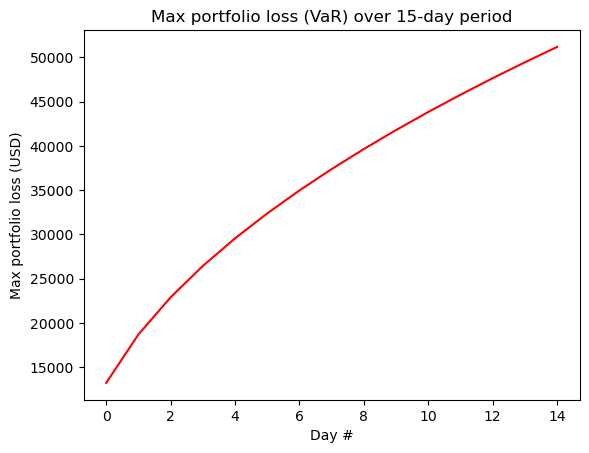

In [10]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")


<h4>(Extra) Checking distributions of our equities against normal distribution</h4>

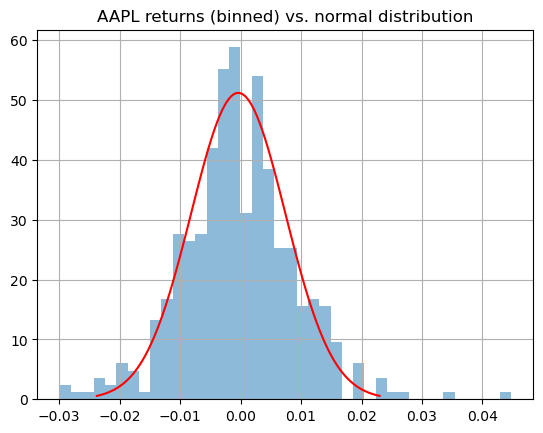

In [11]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

returns['JPEM'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

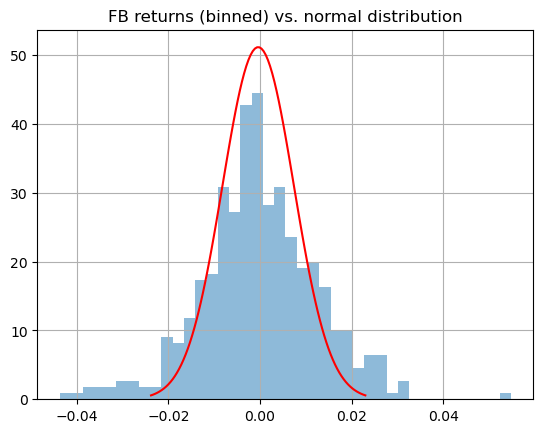

In [12]:
returns['IVV'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("FB returns (binned) vs. normal distribution")
plt.show()

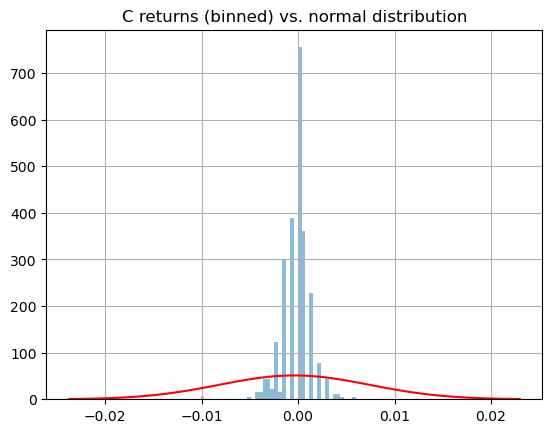

In [13]:
returns['SNDPX'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("C returns (binned) vs. normal distribution")
plt.show()

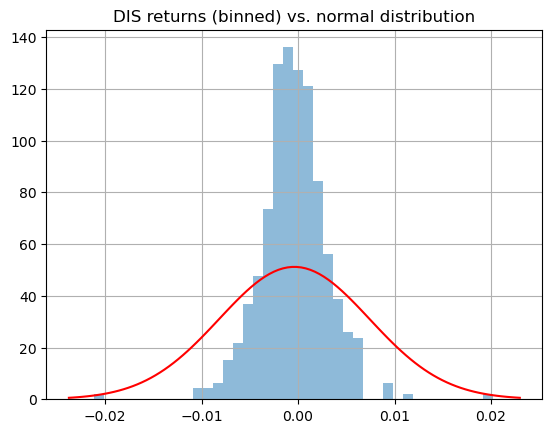

In [14]:
returns['MMIN'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("DIS returns (binned) vs. normal distribution")
plt.show()